In [ ]:
import requests
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'finance',
    'apiKey': API_KEY,
    'language': 'en'
}
response = requests.get(url, params=params)
news_data = response.json()
articles = news_data['articles']

In [ ]:
len(articles)

100

In [ ]:
articles[0]

{'source': {'id': None, 'name': 'BBC News'},
 'author': None,
 'title': 'Treasury must compensate Scotland for tax hike - Robison',
 'description': 'The Scottish finance secretary has warned a rise in National Insurance could cost the government £500m.',
 'url': 'https://www.bbc.com/news/articles/cwyx7zdx8lwo',
 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/94d0/live/9949cf50-976f-11ef-a41c-dd1648bd8502.jpg',
 'publishedAt': '2024-10-31T10:35:55Z',
 'content': "Scottish Finance Secretary Shona Robison says an increase in employers' National Insurance could cost her government £500m \r\nThe Scottish government has demanded that it is fully compensated by the T… [+2730 chars]"}

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

corpus = []
wl = WordNetLemmatizer()

for article in articles:
    title = article['title'] if article['title'] else ''
    description = article['description'] if article['description'] else ''
    content = article['content'] if article.get('content') else ''

    text_data = title + ' ' + description + ' ' + content

    text_data = re.sub('[^a-zA-Z]', ' ', text_data)
    text_data = text_data.lower()
    text_data = text_data.split()

    text_data = [wl.lemmatize(word) for word in text_data if not word in set(stopwords.words('english'))]

    cleaned_text = ' '.join(text_data)

    corpus.append(cleaned_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
len(corpus)

100

In [ ]:
print(corpus[0])

treasury must compensate scotland tax hike robison scottish finance secretary warned rise national insurance could cost government scottish finance secretary shona robison say increase employer national insurance could cost government scottish government demanded fully compensated char


# Sentiment analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentiments2 = [sia.polarity_scores(text) for text in corpus]
print(sentiments2)

[{'neg': 0.1, 'neu': 0.798, 'pos': 0.102, 'compound': 0.0258}, {'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 0.958, 'pos': 0.042, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.6486}, {'neg': 0.056, 'neu': 0.802, 'pos': 0.142, 'compound': 0.6808}, {'neg': 0.193, 'neu': 0.708, 'pos': 0.099, 'compound': -0.7351}, {'neg': 0.242, 'neu': 0.638, 'pos': 0.12, 'compound': -0.7717}, {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.936}, {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.5423}, {'neg': 0.241, 'neu': 0.644, 'pos': 0.116, 'compound': -0.765}, {'neg': 0.117, 'neu': 0.817, 'pos': 0.066, 'compound': -0.3204}, {'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'compound': 0.128}, {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.8658}, {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.9571}, {'neg': 0.195, 'neu': 0.603, 'pos': 0.201, 'compound': -0.2023}, {'neg': 0.062, 'neu': 0.811, 'pos': 0.126, 'compound': 0.1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def classify_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

sentiments = [classify_sentiment(text) for text in corpus]

In [ ]:
print(sentiments)

['neutral', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'po

In [ ]:
def sentiment_to_score(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else:
        return 0

In [ ]:
dates = [article['publishedAt'] for article in articles]
titles = [article['title'] for article in articles]

data = pd.DataFrame({
    "Date": dates,
    "Title": titles,
    "Sentiment": sentiments
})

data.head()

,Date,Title,Sentiment
0,2024-10-31T10:35:55Z,Treasury must compensate Scotland for tax hike...,neutral
1,2024-10-22T06:12:15Z,UK borrowing for September third highest on re...,positive
2,2024-11-06T19:28:33Z,Harris says Irish general election to be calle...,positive
3,2024-11-05T10:50:02Z,"Why quant giant D.E. Shaw seeks out academics,...",positive
4,2024-11-04T10:51:02Z,Who Wall Street thinks will win the election,positive


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       100 non-null    datetime64[ns, UTC]
 1   Title      100 non-null    object             
 2   Sentiment  100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 2.5+ KB


In [ ]:
data = data.sort_values(by='Date')
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
data['Sentiment_score'] = data['Sentiment'].map(sentiment_map)
data.head()

,Date,Title,Sentiment,Sentiment_score
99,2024-10-19 09:04:02+00:00,"Step inside Jackson Hole, Wyoming, where the u...",positive,1
72,2024-10-19 15:29:01+00:00,An accounting manager struggled with work-life...,positive,1
66,2024-10-20 05:50:04+00:00,'Irish database of stillbirths means our son w...,positive,1
21,2024-10-21 05:18:16+00:00,Perth primary schools closed as strikes target...,positive,1
86,2024-10-21 10:50:44+00:00,Israel bombs Hezbollah-linked finance group in...,negative,-1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data['Title']
y = data['Sentiment_score']

vectorizer = TfidfVectorizer(max_features=5000)
X_transformed = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [ ]:
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment_2'] = [classify_sentiment(sent['compound']) for sent in sentiments2]

In [ ]:
def generate_sentiment_index(sentiments):
    sentiment_scores = [sentiment_to_score(sentiment) for sentiment in sentiments]

    if len(sentiment_scores) > 0:
        sentiment_index = sum(sentiment_scores) / len(sentiment_scores)
    else:
        sentiment_index = 0

    return sentiment_index


sentiment_index = generate_sentiment_index(data['Sentiment'])
print(f"Індекс настроїв: {sentiment_index}")

Індекс настроїв: 0.52


In [ ]:
window_size = 7
data['Sentiment_index'] = data['Sentiment_score'].rolling(window=window_size, min_periods=1).mean()
data.head()

,Date,Title,Sentiment,Sentiment_score,Sentiment_index,Sentiment_2
0,2024-10-15 22:17:14+00:00,Trump’s crypto website crashed after its token...,positive,1,1.00,positive
31,2024-10-16 00:10:00+00:00,Trump's Coin Sale Misses Early Targets As Cryp...,positive,1,1.00,neutral
85,2024-10-16 11:14:45+00:00,"Jane Street, the trading firm where SBF starte...",positive,1,1.00,positive
6,2024-10-16 12:00:03+00:00,"Making Friends With Cleo, the AI Budgeting App...",neutral,0,0.75,negative
5,2024-10-16 12:00:46+00:00,Is AI the Answer to Your Money Problems? Here'...,positive,1,0.80,positive


In [ ]:
from collections import deque
import time
import asyncio
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_window = deque(maxlen=100)
sia = SentimentIntensityAnalyzer()

def preprocess_text(text):
    corpus = []
    wl = WordNetLemmatizer()

    for article in articles:
      title = article['title'] if article['title'] else ''
      description = article['description'] if article['description'] else ''
      content = article['content'] if article.get('content') else ''

      text_data = title + ' ' + description + ' ' + content

    text_data = re.sub('[^a-zA-Z]', ' ', text_data)
    text_data = text_data.lower()
    text_data = text_data.split()

    text_data = [wl.lemmatize(word) for word in text_data if not word in set(stopwords.words('english'))]

    cleaned_text = ' '.join(text_data)

    corpus.append(cleaned_text)
    return corpus

def update_sentiment_index(new_article):
    sentiment = sia.polarity_scores(preprocess_text(new_article['content']))
    sentiment_window.append(sentiment['compound'])
    return sum(sentiment_window) / len(sentiment_window)

async def collect_and_update_sentiment(interval=300):
    while True:
        new_news = await get_latest_news()

        for article in new_news:
            current_index = update_sentiment_index(article)
            print(f"Оновлений індекс настроїв: {current_index}")
        await asyncio.sleep(interval)

async def get_latest_news():
    def get_latest_news(api_key, query='finance'):
      url = 'https://newsapi.org/v2/everything'
      headers = {'Authorization': f'Bearer {api_key}'}

      response = requests.get(url, headers=headers)

      if response.status_code == 200:
          data = response.json()
          articles = data.get('articles', [])
          return [{'title': article['title'], 'content': article['content']} for article in articles]
      else:
          print(f"Помилка під час отримання даних: {response.status_code} - {response.text}")
          return []

asyncio.run(collect_and_update_sentiment())

In [ ]:
data = data.sort_values(by='Date')
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
data['Sentiment_score_2'] = data['Sentiment_2'].map(sentiment_map)
data.head()
window_size = 7
data['Sentiment_index_2'] = data['Sentiment_score_2'].rolling(window=window_size, min_periods=1).mean()
data.head()

,Date,Title,Sentiment,Sentiment_score,Sentiment_index,Sentiment_2,Sentiment_score_2,Sentiment_index_2
0,2024-10-15 22:17:14+00:00,Trump’s crypto website crashed after its token...,positive,1,1.00,positive,1,1.000000
31,2024-10-16 00:10:00+00:00,Trump's Coin Sale Misses Early Targets As Cryp...,positive,1,1.00,neutral,0,0.500000
85,2024-10-16 11:14:45+00:00,"Jane Street, the trading firm where SBF starte...",positive,1,1.00,positive,1,0.666667
6,2024-10-16 12:00:03+00:00,"Making Friends With Cleo, the AI Budgeting App...",neutral,0,0.75,negative,-1,0.250000
5,2024-10-16 12:00:46+00:00,Is AI the Answer to Your Money Problems? Here'...,positive,1,0.80,positive,1,0.400000


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
df = yf.download('AAPL', start="2024-01-01", end="2024-11-16")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02 00:00:00+00:00,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03 00:00:00+00:00,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04 00:00:00+00:00,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05 00:00:00+00:00,180.296722,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08 00:00:00+00:00,184.655365,185.559998,185.600006,181.500000,182.089996,59144500


In [ ]:
df.shape

(222, 6)

In [ ]:
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.columns = df.columns.get_level_values(1)
df.reset_index(inplace=True)
df.head()

Ticker,index,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,0,184.734970,185.639999,188.440002,183.889999,187.149994,82488700,2024-01-02 00:00:00+00:00
1,1,183.351746,184.250000,185.880005,183.429993,184.220001,58414500,2024-01-03 00:00:00+00:00
2,2,181.023163,181.910004,183.089996,180.880005,182.149994,71983600,2024-01-04 00:00:00+00:00
3,3,180.296722,181.179993,182.759995,180.169998,181.990005,62303300,2024-01-05 00:00:00+00:00
4,4,184.655365,185.559998,185.600006,181.500000,182.089996,59144500,2024-01-08 00:00:00+00:00


In [ ]:
df.drop('index', axis =1, inplace =True)

In [ ]:
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Date']
df.head()

,Adj Close,Close,High,Low,Open,Volume,Date
0,184.734970,185.639999,188.440002,183.889999,187.149994,82488700,2024-01-02 00:00:00+00:00
1,183.351746,184.250000,185.880005,183.429993,184.220001,58414500,2024-01-03 00:00:00+00:00
2,181.023163,181.910004,183.089996,180.880005,182.149994,71983600,2024-01-04 00:00:00+00:00
3,180.296722,181.179993,182.759995,180.169998,181.990005,62303300,2024-01-05 00:00:00+00:00
4,184.655365,185.559998,185.600006,181.500000,182.089996,59144500,2024-01-08 00:00:00+00:00


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
df['Date'] = pd.to_datetime(df['Date'])

data.sort_values(by='Date', inplace=True)
df.sort_values(by='Date', inplace=True)
merged_data = pd.merge_asof(data, df, on='Date', direction='backward')
merged_data

,Date,Title,Sentiment,Sentiment_score,Sentiment_index,Sentiment_2,Sentiment_score_2,Sentiment_index_2,Adj Close,Close,High,Low,Open,Volume
0,2024-10-15 22:17:14+00:00,Trump’s crypto website crashed after its token...,positive,1,1.000000,positive,1,1.000000,233.593002,233.850006,237.490005,232.369995,233.610001,64751400
1,2024-10-16 00:10:00+00:00,Trump's Coin Sale Misses Early Targets As Cryp...,positive,1,1.000000,neutral,0,0.500000,231.525269,231.779999,232.119995,229.839996,231.600006,34082200
2,2024-10-16 11:14:45+00:00,"Jane Street, the trading firm where SBF starte...",positive,1,1.000000,positive,1,0.666667,231.525269,231.779999,232.119995,229.839996,231.600006,34082200
3,2024-10-16 12:00:03+00:00,"Making Friends With Cleo, the AI Budgeting App...",neutral,0,0.750000,negative,-1,0.250000,231.525269,231.779999,232.119995,229.839996,231.600006,34082200
4,2024-10-16 12:00:46+00:00,Is AI the Answer to Your Money Problems? Here'...,positive,1,0.800000,positive,1,0.400000,231.525269,231.779999,232.119995,229.839996,231.600006,34082200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-11-14 22:32:21+00:00,How Small Businesses Can Help Tackle Climate C...,positive,1,0.857143,neutral,0,-0.142857,228.220001,228.220001,228.869995,225.000000,225.020004,44923900
96,2024-11-15 10:42:02+00:00,This new Goldman Sachs partner is leading the ...,positive,1,0.857143,negative,-1,-0.285714,225.000000,225.000000,226.919998,224.270004,226.399994,47832200
97,2024-11-15 14:00:00+00:00,How 3 Companies Are Using AI to Mimic Expert J...,positive,1,0.857143,negative,-1,-0.571429,225.000000,225.000000,226.919998,224.270004,226.399994,47832200
98,2024-11-15 14:38:00+00:00,Strong Economy Leaves Fed in No Hurry to Cut I...,positive,1,0.857143,positive,1,-0.285714,225.000000,225.000000,226.919998,224.270004,226.399994,47832200


In [ ]:
correlation = merged_data['Sentiment_index'].corr(merged_data['Close'])
print(f"Кореляція між індексом настроїв і цінами закриття акцій: {correlation}")

Кореляція між індексом настроїв і цінами закриття акцій: -0.2549218046311431


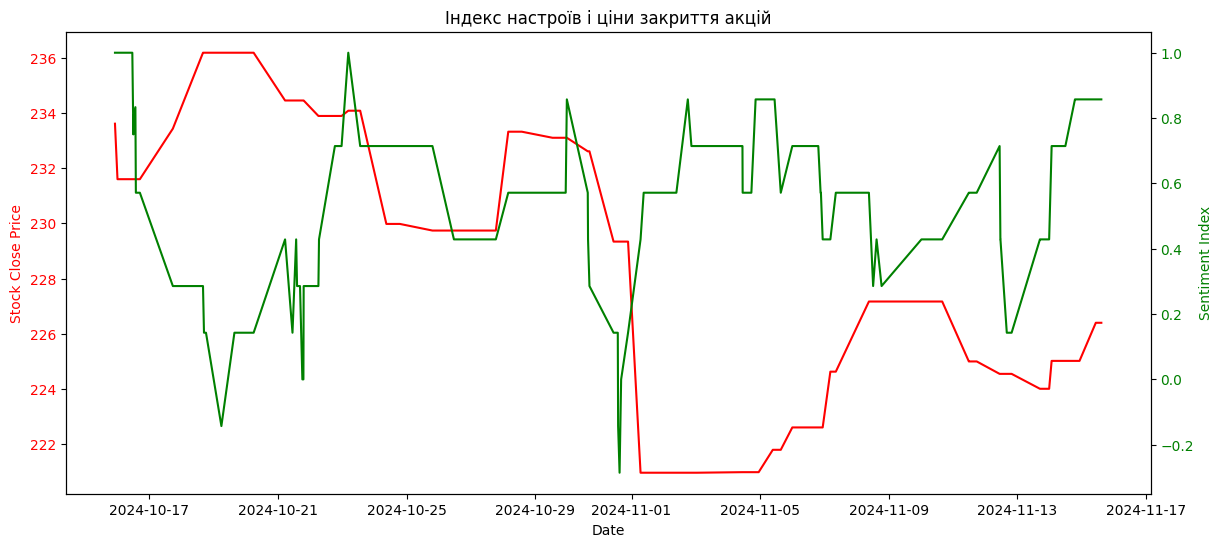

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(merged_data['Date'], merged_data['Open'], label='Stock Close Price', color = 'red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Sentiment_index'], label='Sentiment Index', color ='green')
ax2.set_ylabel('Sentiment Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Індекс настроїв і ціни закриття акцій')
plt.show()

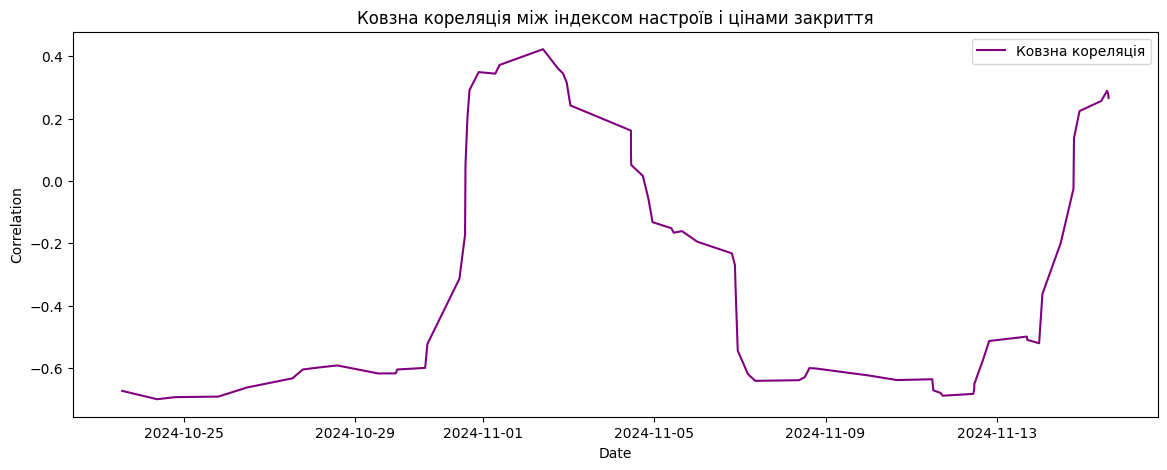

In [ ]:
window_size = 30
rolling_correlation = merged_data['Sentiment_index'].rolling(window=window_size).corr(merged_data['Close'])

plt.figure(figsize=(14, 5))
plt.plot(merged_data['Date'], rolling_correlation, label='Ковзна кореляція', color='purple')
plt.title('Ковзна кореляція між індексом настроїв і цінами закриття')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

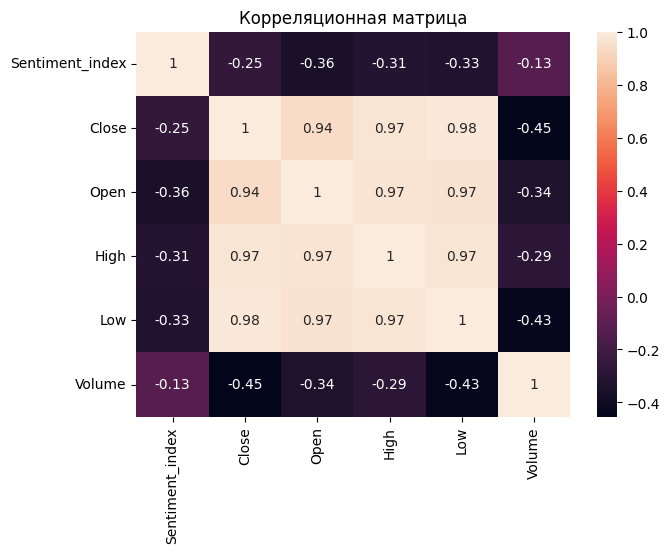

In [ ]:
correlation_matrix = merged_data[['Sentiment_index', 'Close', 'Open', 'High', 'Low', 'Volume']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Корреляционная матрица')
plt.show()